# 08 Random Forest Code

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from collections import Counter
from sklearn import tree

In [2]:
data_url = r'https://raw.githubusercontent.com/GonieAhn/Data-Science-online-course-from-gonie/main/Data%20Store/example_data.csv'

In [3]:
data_df = pd.read_csv(data_url)
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 23 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   censor   532 non-null    int64  
 1   event    532 non-null    int64  
 2   age      532 non-null    int64  
 3   wtkg     532 non-null    float64
 4   hemo     532 non-null    int64  
 5   homo     532 non-null    int64  
 6   drugs    532 non-null    int64  
 7   karnof   532 non-null    int64  
 8   oprior   532 non-null    int64  
 9   z30      532 non-null    int64  
 10  zprior   532 non-null    int64  
 11  preanti  532 non-null    int64  
 12  race     532 non-null    int64  
 13  gender   532 non-null    int64  
 14  str2     532 non-null    int64  
 15  strat    532 non-null    int64  
 16  symptom  532 non-null    int64  
 17  cd40     532 non-null    int64  
 18  cd420    532 non-null    int64  
 19  cd496    532 non-null    int64  
 20  r        532 non-null    int64  
 21  cd80     532 non

In [6]:
data_df.shape

(532, 23)

In [4]:
data_df.describe()

,censor,event,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,gender,str2,strat,symptom,cd40,cd420,cd496,r,cd80,cd820
count,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,...,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000
mean,0.340226,801.236842,35.225564,76.061855,0.078947,0.640977,0.118421,95.432331,0.030075,0.546992,...,0.812030,0.580827,1.981203,0.167293,353.204887,336.139098,173.146617,0.603383,987.250000,928.214286
std,0.474231,326.887929,8.852094,13.224698,0.269910,0.480165,0.323410,5.981856,0.170955,0.498255,...,0.391056,0.493888,0.905946,0.373589,114.105253,130.961573,191.455406,0.489656,475.223907,438.569798
min,0.000000,33.000000,13.000000,47.401000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,103.000000,49.000000,-1.000000,0.000000,221.000000,150.000000
25%,0.000000,535.750000,29.000000,67.500000,0.000000,0.000000,0.000000,90.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,271.000000,243.750000,-1.000000,0.000000,653.250000,626.500000
50%,0.000000,933.500000,34.000000,74.600000,0.000000,1.000000,0.000000,100.000000,0.000000,1.000000,...,1.000000,1.000000,2.000000,0.000000,346.000000,330.500000,113.000000,1.000000,881.000000,818.000000
75%,1.000000,1081.000000,40.000000,83.502000,0.000000,1.000000,0.000000,100.000000,0.000000,1.000000,...,1.000000,1.000000,3.000000,0.000000,422.000000,418.000000,324.000000,1.000000,1190.000000,1164.000000
max,1.000000,1231.000000,70.000000,149.000000,1.000000,1.000000,1.000000,100.000000,1.000000,1.000000,...,1.000000,1.000000,3.000000,1.000000,771.000000,909.000000,857.000000,1.000000,4255.000000,3130.000000


In [8]:
Counter(data_df['censor'])

Counter({0: 351, 1: 181})

In [10]:
y = data_df['censor']
X = data_df.drop(columns=['censor'])

In [11]:
idx = list(range(X.shape[0]))
train_idx, valid_idx = train_test_split(idx, test_size=0.3, random_state=2023)
print(f'train data : {len(train_idx)}')
print(f'valid data : {len(valid_idx)}')
print(f'train data y : {Counter(y.iloc[train_idx])}')
print(f'train data y : {Counter(y.iloc[valid_idx])}')

train data : 372
valid data : 160
train data y : Counter({0: 250, 1: 122})
train data y : Counter({0: 101, 1: 59})


In [12]:
for i in range(2,11,1):
    print(f">>> Depth : {i}")
    model = DecisionTreeClassifier(max_depth=i, criterion='gini')
    model.fit(X.iloc[train_idx], y.iloc[train_idx])

    # train ACC
    y_pred_train = model.predict(X.iloc[train_idx])
    cm_train = confusion_matrix(y.iloc[train_idx], y_pred_train)
    print('train Confusion Matrix')
    print(cm_train)
    print(f'train acc : {(cm_train[0,0]+cm_train[1,1]) / cm_train.sum()}')
    print(f'train F1-Score : {f1_score(y.iloc[train_idx], y_pred_train)}')

    # valid ACC
    y_pred_test = model.predict(X.iloc[valid_idx])
    cm_test = confusion_matrix(y.iloc[valid_idx], y_pred_test)
    print('valid Confusion Matrix')
    print(cm_test)
    print(f'test acc : {(cm_test[0,0]+cm_test[1,1]) / cm_test.sum()}')
    print(f'test F1-Score : {f1_score(y.iloc[valid_idx], y_pred_test)}')
    print('-'*10)

>>> Depth : 2
train Confusion Matrix
[[241   9]
 [ 44  78]]
train acc : 0.8575268817204301
train F1-Score : 0.7464114832535885
valid Confusion Matrix
[[97  4]
 [26 33]]
test acc : 0.8125
test F1-Score : 0.6874999999999999
----------
>>> Depth : 3
train Confusion Matrix
[[228  22]
 [ 18 104]]
train acc : 0.8924731182795699
train F1-Score : 0.8387096774193549
valid Confusion Matrix
[[88 13]
 [13 46]]
test acc : 0.8375
test F1-Score : 0.7796610169491526
----------
>>> Depth : 4
train Confusion Matrix
[[227  23]
 [ 10 112]]
train acc : 0.9112903225806451
train F1-Score : 0.8715953307392996
valid Confusion Matrix
[[89 12]
 [11 48]]
test acc : 0.85625
test F1-Score : 0.8067226890756303
----------
>>> Depth : 5
train Confusion Matrix
[[241   9]
 [ 17 105]]
train acc : 0.9301075268817204
train F1-Score : 0.8898305084745763
valid Confusion Matrix
[[91 10]
 [16 43]]
test acc : 0.8375
test F1-Score : 0.7678571428571428
----------
>>> Depth : 6
train Confusion Matrix
[[246   4]
 [  7 115]]
train a

In [13]:
model = DecisionTreeClassifier(max_depth=4, criterion='gini')
model.fit(X.iloc[train_idx], y.iloc[train_idx])

DecisionTreeClassifier(max_depth=4)

In [29]:
y_pred_test = model.predict(X.iloc[valid_idx])
cm_test = confusion_matrix(y.iloc[valid_idx], y_pred_test)
print('valid Confusion Matrix')
print(cm_test)
print(f'test acc : {(cm_test[0,0]+cm_test[1,1]) / cm_test.sum()}')
print(f'test F1-Score : {f1_score(y.iloc[valid_idx], y_pred_test)}')

valid Confusion Matrix
[[90 11]
 [14 45]]
test acc : 0.84375
test F1-Score : 0.782608695652174


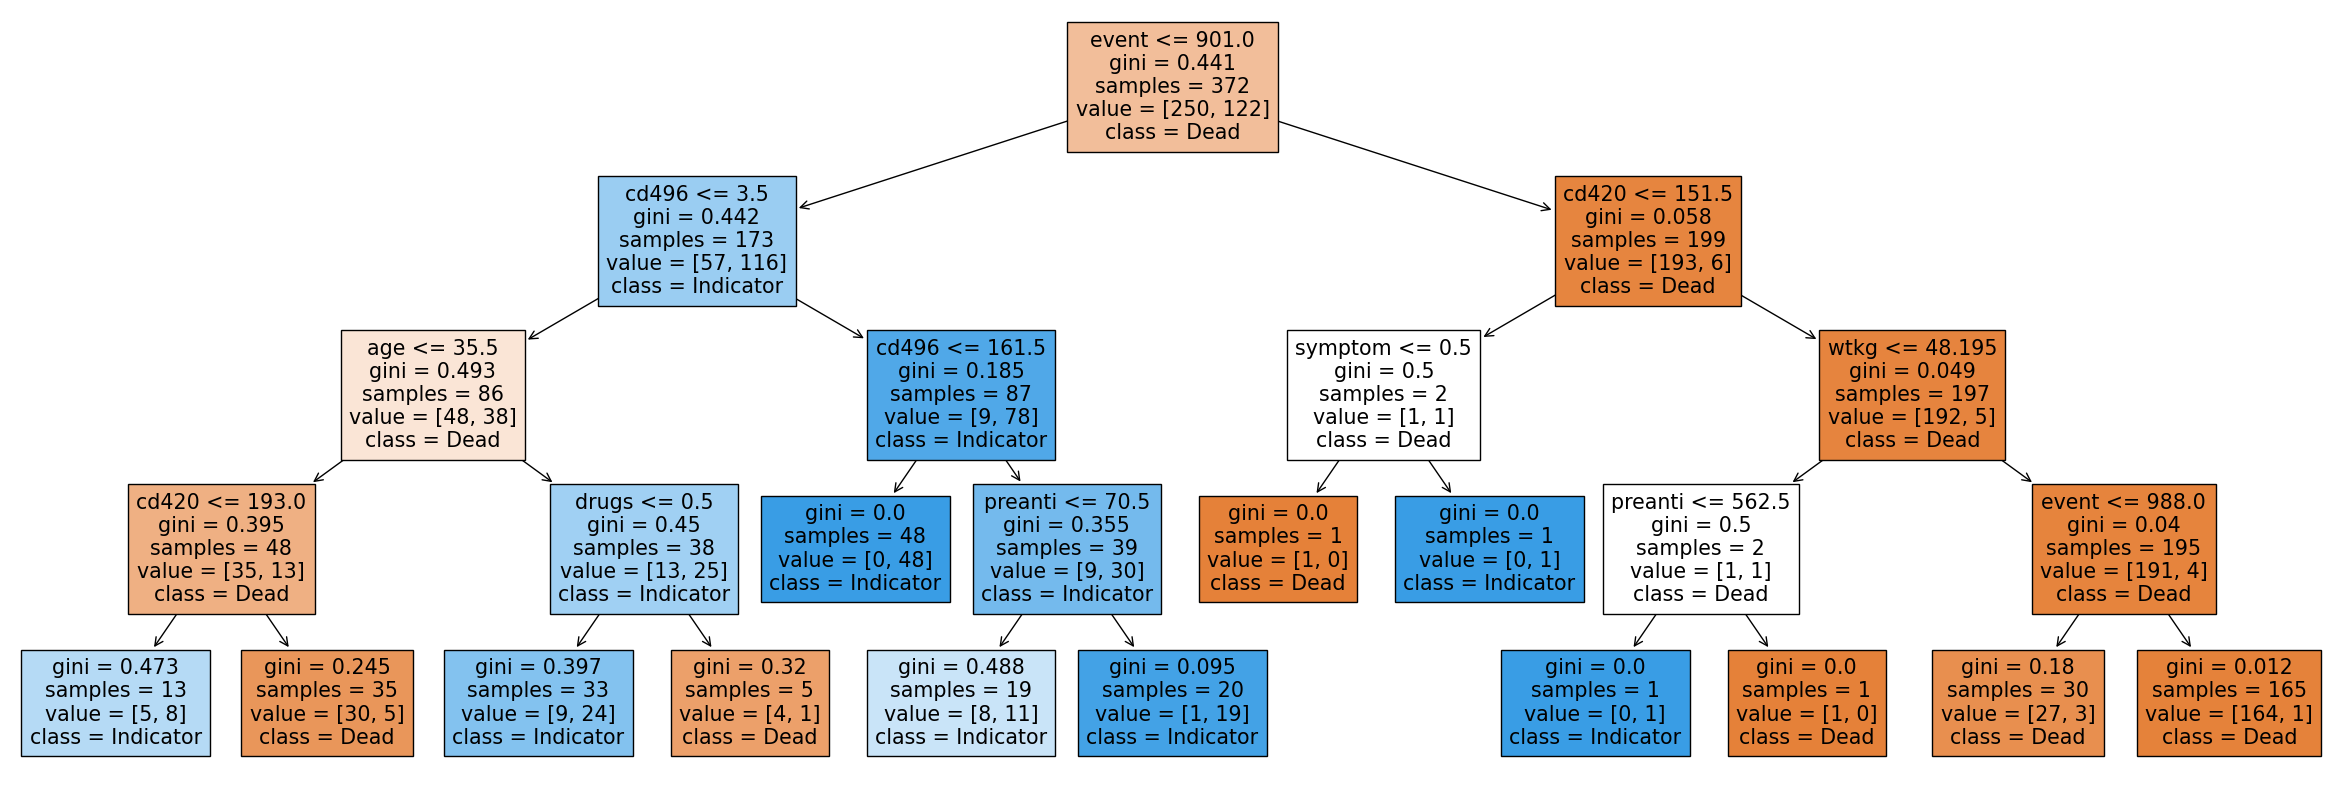

In [17]:
tree.plot_tree(model, filled=True, feature_names=list(X.columns), class_names=['Dead', 'Indicator'])
plt.rcParams['figure.figsize'] = [30, 10]

[Random Forest]
 - Hyperparameter tuning
 - estimators, depth
 - Random Forest는 이 두개만 조절해도 좋은 결과를 얻을 수 있음
 - GridSearchCV를 사용하지 않고 For Loop를 돌리는 이유
    - 내가 원하는 결과를 저장하고 Display 하고 싶음
    - 내가 원하는 결과를 실시간 Display 하면서 그때 그때 파라미터 튜닝에 대한 대처를 하고 싶음

[Random Forest Parameters]
  - Package : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
  - n_estimators : # of Tree
  - criterion : Measuring for Split (Information gain)
     - Gini
     - entropy
     - log_loss
  - max_depth : Tree의 최대 깊이 제한
  - min_samples_split : 2개로 Split 하는게 아니라 N개로 Split 가능
  - bootstrap : Bagging 중 Boostrap 기법
  - max_features : Feature 수 sampling - random chosen(복원 추출 아님)
     - auto
     - sqrt
     - log2
  - oob_score : out-of-bag Score
  - class_weight : Label Imbalance 데이터 학습시 weight를 주는 것
     - {0: 1, 1: 1}
  - random_state : Two way Random Choosen 때문에 매 결과가 달라짐
     - 지정한 값으로 해주는 것이 결과가 같아짐

In [18]:
estimators = [10, 30, 40, 50, 60]
depth = [4, 5, 10, 15]

In [19]:
save_est = []
save_dep = []
f1_score_ = []

In [26]:
cnt = 0
for est in estimators:
    for dep in depth:
        print(f'>>> {cnt} <<<')
        cnt += 1
        print(f'number of estimators : {est}, max depth : {dep}')
        model = RandomForestClassifier(
            n_estimators=est,
            max_depth=dep,
            random_state=119,
            criterion='gini',
            max_features='sqrt',
            bootstrap=True,
            oob_score=True
        )

        model.fit(X.iloc[train_idx], y.iloc[train_idx])

        # Train Acc
        y_pred_train = model.predict(X.iloc[train_idx])
        cm_train = confusion_matrix(y.iloc[train_idx], y_pred_train)
        print('train Confusion Matrix')
        print(cm_train)
        print(f'train Acc: {(cm_train[0,0] + cm_train[1,1]) / cm_train.sum()}')
        print(f'train F1-Score: {f1_score(y.iloc[train_idx], y_pred_train)}')

        # Test Acc
        y_pred_test = model.predict(X.iloc[valid_idx])
        cm_test = confusion_matrix(y.iloc[valid_idx], y_pred_test)
        print('test Confusion Matrix')
        print(cm_test)
        print(f'test Acc: {(cm_test[0,0] + cm_test[1,1]) / cm_test.sum()}')
        print(f'test F1-Score: {f1_score(y.iloc[valid_idx], y_pred_test)}')
        print('-'*20)
        save_dep.append(dep)
        save_est.append(est)
        f1_score_.append(f1_score(y.iloc[valid_idx], y_pred_test))

>>> 0 <<<
number of estimators : 10, max depth : 4
train Confusion Matrix
[[242   8]
 [ 29  93]]
train Acc: 0.9005376344086021
train F1-Score: 0.8340807174887892
test Confusion Matrix
[[93  8]
 [26 33]]
test Acc: 0.7875
test F1-Score: 0.6599999999999999
--------------------
>>> 1 <<<
number of estimators : 10, max depth : 5
train Confusion Matrix
[[243   7]
 [ 14 108]]
train Acc: 0.9435483870967742
train F1-Score: 0.9113924050632911
test Confusion Matrix
[[90 11]
 [23 36]]
test Acc: 0.7875
test F1-Score: 0.679245283018868
--------------------
>>> 2 <<<
number of estimators : 10, max depth : 10
train Confusion Matrix
[[249   1]
 [  3 119]]
train Acc: 0.989247311827957
train F1-Score: 0.9834710743801653
test Confusion Matrix
[[93  8]
 [23 36]]
test Acc: 0.80625
test F1-Score: 0.6990291262135923
--------------------
>>> 3 <<<
number of estimators : 10, max depth : 15
train Confusion Matrix
[[249   1]
 [  1 121]]
train Acc: 0.9946236559139785
train F1-Score: 0.9918032786885246
test Confusi

C:\Users\dukim\miniconda3\envs\bootcamp\lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\dukim\miniconda3\envs\bootcamp\lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\dukim\miniconda3\envs\bootcamp\lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\dukim\miniconda3\envs\bootcamp\lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


train Confusion Matrix
[[244   6]
 [ 16 106]]
train Acc: 0.9408602150537635
train F1-Score: 0.9059829059829059
test Confusion Matrix
[[93  8]
 [18 41]]
test Acc: 0.8375
test F1-Score: 0.7592592592592592
--------------------
>>> 5 <<<
number of estimators : 30, max depth : 5
train Confusion Matrix
[[246   4]
 [  9 113]]
train Acc: 0.9650537634408602
train F1-Score: 0.9456066945606694
test Confusion Matrix
[[93  8]
 [18 41]]
test Acc: 0.8375
test F1-Score: 0.7592592592592592
--------------------
>>> 6 <<<
number of estimators : 30, max depth : 10
train Confusion Matrix
[[250   0]
 [  0 122]]
train Acc: 1.0
train F1-Score: 1.0
test Confusion Matrix
[[93  8]
 [13 46]]
test Acc: 0.86875
test F1-Score: 0.8141592920353983
--------------------
>>> 7 <<<
number of estimators : 30, max depth : 15
train Confusion Matrix
[[250   0]
 [  0 122]]
train Acc: 1.0
train F1-Score: 1.0
test Confusion Matrix
[[93  8]
 [14 45]]
test Acc: 0.8625
test F1-Score: 0.8035714285714285
--------------------
>>> 8 <<

In [27]:
np.argmax(f1_score_)

10

In [28]:
# Best Model
best_model = RandomForestClassifier(
    n_estimators=save_est[np.argmax(f1_score_)],
    max_depth=save_dep[np.argmax(f1_score_)],
    random_state=119,
    criterion='gini',
    max_features='sqrt',
    bootstrap=True,
    oob_score=True,
)
best_model.fit(X.iloc[train_idx], y.iloc[train_idx])

RandomForestClassifier(max_depth=10, n_estimators=40, oob_score=True,
                       random_state=119)

In [24]:
# Train Acc
y_pred_train = best_model.predict(X.iloc[train_idx])
cm_train = confusion_matrix(y.iloc[train_idx], y_pred_train)
print('train Confusion Matrix')
print(cm_train)
print(f'train ACC : {(cm_train[0, 0] + cm_train[1, 1]) / cm_train.sum()}')
print(f'train f1-score : {f1_score(y.iloc[train_idx], y_pred_train)}')

train Confusion Matrix
[[250   0]
 [  0 122]]
train ACC : 1.0
f1-score : 1.0


In [25]:
# valid Acc
y_pred_test = best_model.predict(X.iloc[valid_idx])
cm_test = confusion_matrix(y.iloc[valid_idx], y_pred_test)
print('test Confusion Matrix')
print(cm_test)
print(f'test ACC : {(cm_test[0, 0] + cm_test[1, 1]) / cm_test.sum()}')
print(f'test f1-score : {f1_score(y.iloc[valid_idx], y_pred_test)}')

test Confusion Matrix
[[93  8]
 [12 47]]
test ACC : 0.875
test f1-score : 0.8245614035087718


In [31]:
feature_map = pd.DataFrame(sorted(zip(best_model.feature_importances_, X.columns), reverse=True), columns=['Score', 'Feature'])
print(feature_map)

       Score  Feature
0   0.325071    event
1   0.116611    cd420
2   0.080297    cd496
3   0.068333     cd80
4   0.066404     wtkg
5   0.064655    cd820
6   0.062691     cd40
7   0.054047      age
8   0.047875  preanti
9   0.036185        r
10  0.013194   karnof
11  0.011671    strat
12  0.011409     race
13  0.006760    drugs
14  0.006678   gender
15  0.006291     hemo
16  0.006121     homo
17  0.005438  symptom
18  0.005390      z30
19  0.004878     str2
20  0.000000   zprior
21  0.000000   oprior


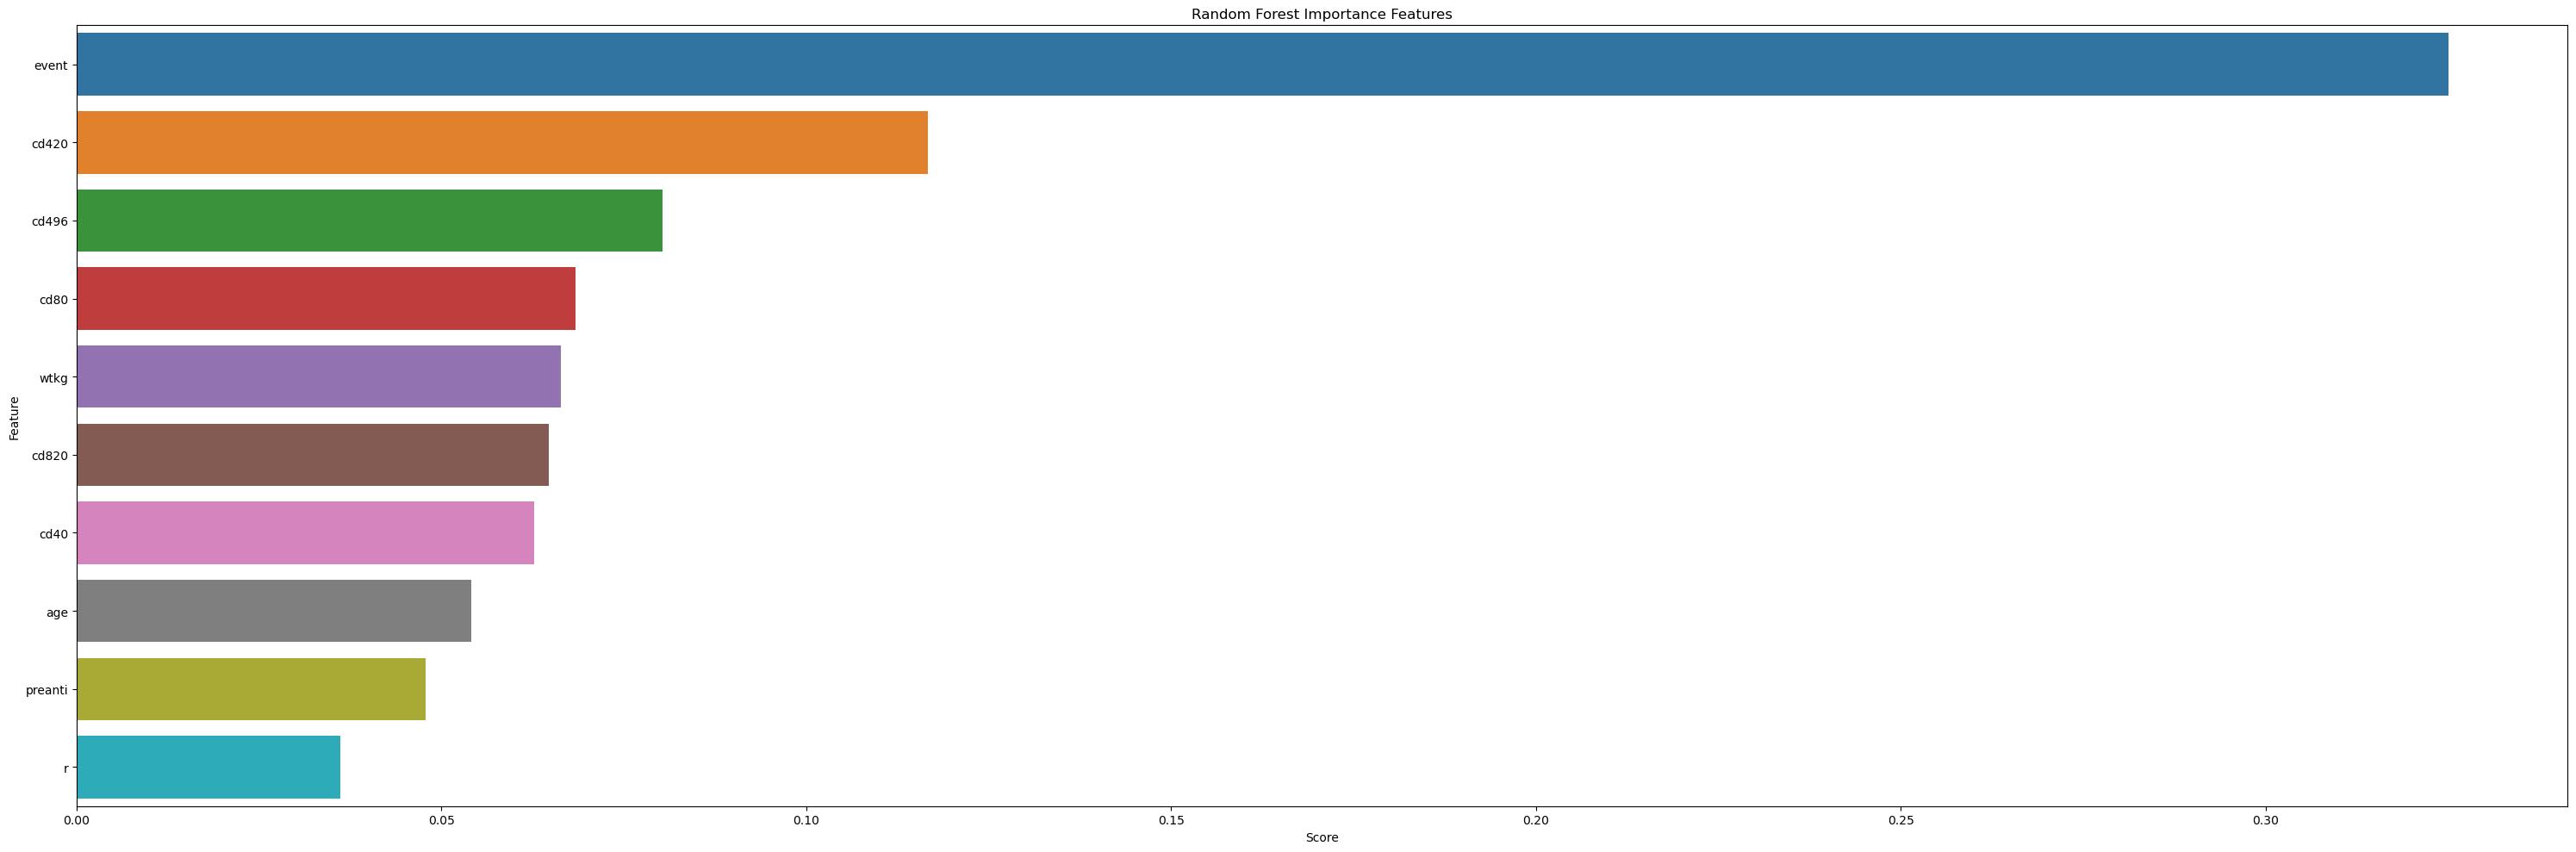

In [34]:
feature_map_20 = feature_map.iloc[:10]
sns.barplot(data=feature_map_20, x='Score', y='Feature')
plt.title('Random Forest Importance Features')
plt.tight_layout()
plt.show()